In [1]:
import glob
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import tensorflow as tf 
from tqdm import tqdm
from tensorflow.keras import optimizers

import sklearn
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix

In [2]:
path = r'D:\Breast cancer material\MIAS_Preprocess\mias_preprocess_Part1\original\train'
folders=glob.glob(os.path.join(path,'*'))
label=[]
i=0
imgs=[]
for fol in folders:
    files=glob.glob(os.path.join(fol,'*'))
    for image in files:
        im=cv2.imread(image)
        im= cv2.resize(im,(160,160))
        imgs.append(im)
        label.append(i)
    i=i+1
    
imgs=np.array(imgs)
label=np.array(label)
imgs,label=shuffle(imgs,label)

In [3]:
path = r'D:\Breast cancer material\MIAS_Preprocess\mias_preprocess_Part1\original\test'
folders=glob.glob(os.path.join(path,'*'))
label_test=[]
i=0
imgs_test=[]
for fol in tqdm(folders):
    files=glob.glob(os.path.join(fol,'*'))
    for image in tqdm(files):
        im=cv2.imread(image)
        im= cv2.resize(im,(160,160))
        imgs_test.append(im)
        label_test.append(i)
    i=i+1
    
imgs_test=np.array(imgs_test)
label_test=np.array(label_test)
imgs_test,label_test=shuffle(imgs_test,label_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 3008.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 3342.34it/s]

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 115.69it/s]


In [4]:
len(label_test), imgs_test.shape

(60, (60, 160, 160, 3))

In [5]:
model = tf.keras.applications.DenseNet121(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(160,160, 3),
    pooling=None,
    classes=3
)
model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 166, 166, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 80, 80, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 80, 80, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [6]:

optimizer=optimizers.SGD(lr=0.001, momentum=0.9)
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              # optimizer=optimizers.RMSprop(lr=1e-4),
              optimizer=optimizer,
              metrics=['accuracy'])

C:\Users\Umar\anaconda3\envs\keras\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [7]:
batch_size = 8
step_per_epoch = b.shape[0]/8


NameError: name 'b' is not defined

In [12]:
import tensorflow.keras.callbacks as callbacks
model_path = 'DenseNet121_new.h5'
model_check_points = callbacks.ModelCheckpoint(filepath= model_path, monitor='val_loss', verbose=0, save_best_only=True,
                                                save_weights_only=False, mode='auto', save_freq='epoch',
                                                options=None)
ES = callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False )
monitor = 'categorical_accuracy'
# reduce_lr = callbacks.ReduceLROnPlateau(monitor=monitor, patience=3)


In [13]:
tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)
history =  model.fit(imgs,b, epochs=100, batch_size = batch_size, validation_split=0.01,
                    callbacks = [model_check_points])

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.
Epoch 1/100


C:\Users\Umar\anaconda3\envs\keras\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(


39/39 [==============================] - 16s 238ms/step - loss: 0.9169 - accuracy: 0.6405 - val_loss: 6.7456 - val_accuracy: 0.2500
Epoch 2/100
39/39 [==============================] - 9s 230ms/step - loss: 0.8039 - accuracy: 0.6961 - val_loss: 4.2827 - val_accuracy: 0.2500
Epoch 3/100
39/39 [==============================] - 9s 229ms/step - loss: 0.7518 - accuracy: 0.7026 - val_loss: 4.1422 - val_accuracy: 0.2500
Epoch 4/100
39/39 [==============================] - 9s 229ms/step - loss: 0.8272 - accuracy: 0.6699 - val_loss: 4.1264 - val_accuracy: 0.5000
Epoch 5/100
39/39 [==============================] - 9s 230ms/step - loss: 0.7318 - accuracy: 0.6830 - val_loss: 0.2684 - val_accuracy: 1.0000
Epoch 6/100
39/39 [==============================] - 9s 229ms/step - loss: 0.7062 - accuracy: 0.7222 - val_loss: 1.2174 - val_accuracy: 0.7500
Epoch 7/100
39/39 [==============================] - 9s 224ms/step - loss: 0.6514 - accuracy: 0.7288 - val_loss: 0.4843 - val_accuracy: 0.7500
Epoch 8/10

39/39 [==============================] - 9s 228ms/step - loss: 0.0779 - accuracy: 0.9804 - val_loss: 1.3748 - val_accuracy: 0.7500
Epoch 59/100
39/39 [==============================] - 9s 226ms/step - loss: 0.1383 - accuracy: 0.9575 - val_loss: 0.6806 - val_accuracy: 0.7500
Epoch 60/100
39/39 [==============================] - 9s 231ms/step - loss: 0.1190 - accuracy: 0.9510 - val_loss: 2.0677 - val_accuracy: 0.7500
Epoch 61/100
39/39 [==============================] - 9s 224ms/step - loss: 0.1640 - accuracy: 0.9346 - val_loss: 1.8853 - val_accuracy: 0.5000
Epoch 62/100
39/39 [==============================] - 9s 231ms/step - loss: 0.1540 - accuracy: 0.9477 - val_loss: 1.0656 - val_accuracy: 0.7500
Epoch 63/100
39/39 [==============================] - 9s 227ms/step - loss: 0.1880 - accuracy: 0.9542 - val_loss: 2.0817 - val_accuracy: 0.7500
Epoch 64/100
39/39 [==============================] - 9s 227ms/step - loss: 0.1014 - accuracy: 0.9673 - val_loss: 0.8868 - val_accuracy: 0.7500
Epoch

In [16]:
model.load_weights('DenseNet121_new.h5')
pred_labs = []
for i in range(len(label_test)):
    img =  imgs_test[i,:, :, :]
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    pred = pred.argmax(axis=1)
    pred_labs.append(pred[0])
    
pred_labs=np.array(pred_labs)

In [19]:

pred_labs = pred_labs+10
pred_labs = np.where(pred_labs==12,0, pred_labs)
pred_labs = np.where(pred_labs==11,2, pred_labs)
pred_labs = np.where(pred_labs==10,1, pred_labs)

label_test = label_test+10
label_test = np.where(label_test==12,0, label_test)
label_test = np.where(label_test==11,2, label_test)
label_test = np.where(label_test==10,1, label_test)

print('Accuracy is: ', get_accuracy(label_test, pred_labs))

Accuracy is:  69.64285714285715


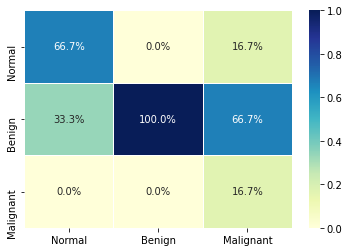

In [21]:
array = sklearn.metrics.confusion_matrix(pred_labs, label_test)
array = array / array.astype(np.float).sum(axis=0)
ax = sn.heatmap(array,annot=True,cmap="YlGnBu", linewidth=0.5,fmt=".1%",xticklabels=['Normal','Benign','Malignant'], yticklabels=['Normal','Benign','Malignant'])

figure = ax.get_figure()

# DenseNet169

In [22]:
model = tf.keras.applications.DenseNet169(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(160,160, 3),
    pooling=None,
    classes=3
)
model.summary()

Model: "densenet169"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_6 (ZeroPadding2D (None, 166, 166, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 80, 80, 64)   9408        zero_padding2d_6[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 80, 80, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [24]:
optimizer=optimizers.SGD(lr=0.001, momentum=0.9)
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              # optimizer=optimizers.RMSprop(lr=1e-4),
              optimizer=optimizer,
              metrics=['accuracy'])

In [25]:
import tensorflow.keras.callbacks as callbacks
model_path = 'DenseNet169.h5'
model_check_points = callbacks.ModelCheckpoint(filepath= model_path, monitor='val_loss', verbose=0, save_best_only=True,
                                                save_weights_only=False, mode='auto', save_freq='epoch',
                                                options=None)
ES = callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False )
monitor = 'categorical_accuracy'
# reduce_lr = callbacks.ReduceLROnPlateau(monitor=monitor, patience=3)

In [26]:
tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)
history =  model.fit(imgs,b, epochs=100, batch_size = batch_size, validation_split=0.01,
                    callbacks = [model_check_points])

C:\Users\Umar\anaconda3\envs\keras\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(


Epoch 1/100
39/39 [==============================] - 13s 316ms/step - loss: 0.9556 - accuracy: 0.6275 - val_loss: 1.1613 - val_accuracy: 0.7500
Epoch 2/100
39/39 [==============================] - 12s 315ms/step - loss: 0.8429 - accuracy: 0.6667 - val_loss: 0.5952 - val_accuracy: 0.7500
Epoch 3/100
39/39 [==============================] - 12s 316ms/step - loss: 0.8196 - accuracy: 0.6699 - val_loss: 0.5002 - val_accuracy: 0.7500
Epoch 4/100
39/39 [==============================] - 12s 318ms/step - loss: 0.8087 - accuracy: 0.6667 - val_loss: 0.6343 - val_accuracy: 0.7500
Epoch 5/100
39/39 [==============================] - 12s 316ms/step - loss: 0.7279 - accuracy: 0.6928 - val_loss: 0.5504 - val_accuracy: 0.7500
Epoch 6/100
39/39 [==============================] - 12s 318ms/step - loss: 0.7161 - accuracy: 0.7092 - val_loss: 1.2409 - val_accuracy: 0.5000
Epoch 7/100
39/39 [==============================] - 12s 318ms/step - loss: 0.7363 - accuracy: 0.6961 - val_loss: 1.1972 - val_accuracy:

In [27]:
model.load_weights('DenseNet169.h5')
pred_labs = []
for i in range(len(label_test)):
    img =  imgs_test[i,:, :, :]
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    pred = pred.argmax(axis=1)
    pred_labs.append(pred[0])
    
pred_labs=np.array(pred_labs)

In [28]:

pred_labs = pred_labs+10
pred_labs = np.where(pred_labs==12,0, pred_labs)
pred_labs = np.where(pred_labs==11,2, pred_labs)
pred_labs = np.where(pred_labs==10,1, pred_labs)

label_test = label_test+10
label_test = np.where(label_test==12,0, label_test)
label_test = np.where(label_test==11,2, label_test)
label_test = np.where(label_test==10,1, label_test)

print('Accuracy is: ', get_accuracy(label_test, pred_labs))

Accuracy is:  23.214285714285715


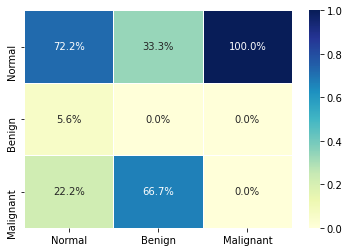

In [30]:
array = sklearn.metrics.confusion_matrix(pred_labs, label_test)
array = array / array.astype(np.float).sum(axis=0)
ax = sn.heatmap(array,annot=True,cmap="YlGnBu", linewidth=0.5,fmt=".1%",xticklabels=['Normal','Benign','Malignant'], yticklabels=['Normal','Benign','Malignant'])

figure = ax.get_figure()

# DenseNet201

In [31]:
model = tf.keras.applications.DenseNet201(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(160,160, 3),
    pooling=None,
    classes=3
)
model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_8 (ZeroPadding2D (None, 166, 166, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 80, 80, 64)   9408        zero_padding2d_8[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 80, 80, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [32]:
optimizer=optimizers.SGD(lr=0.001, momentum=0.9)
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              # optimizer=optimizers.RMSprop(lr=1e-4),
              optimizer=optimizer,
              metrics=['accuracy'])

C:\Users\Umar\anaconda3\envs\keras\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [33]:
import tensorflow.keras.callbacks as callbacks
model_path = 'DenseNet201.h5'
model_check_points = callbacks.ModelCheckpoint(filepath= model_path, monitor='val_loss', verbose=0, save_best_only=True,
                                                save_weights_only=False, mode='auto', save_freq='epoch',
                                                options=None)
ES = callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False )
monitor = 'categorical_accuracy'
# reduce_lr = callbacks.ReduceLROnPlateau(monitor=monitor, patience=3)

In [34]:
tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)
history =  model.fit(imgs,b, epochs=50, batch_size = batch_size, validation_split=0.01,
                    callbacks = [model_check_points])

C:\Users\Umar\anaconda3\envs\keras\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(


Epoch 1/50
39/39 [==============================] - 15s 378ms/step - loss: 0.9118 - accuracy: 0.6340 - val_loss: 2.6182 - val_accuracy: 0.2500
Epoch 2/50
39/39 [==============================] - 15s 382ms/step - loss: 0.8410 - accuracy: 0.6569 - val_loss: 3.2726 - val_accuracy: 0.0000e+00
Epoch 3/50
39/39 [==============================] - 15s 383ms/step - loss: 0.8457 - accuracy: 0.6765 - val_loss: 2.7174 - val_accuracy: 0.5000
Epoch 4/50
39/39 [==============================] - 15s 388ms/step - loss: 0.7823 - accuracy: 0.6830 - val_loss: 0.9809 - val_accuracy: 0.7500
Epoch 5/50
39/39 [==============================] - 15s 383ms/step - loss: 0.7854 - accuracy: 0.6895 - val_loss: 2.5128 - val_accuracy: 0.5000
Epoch 6/50
39/39 [==============================] - 15s 386ms/step - loss: 0.7097 - accuracy: 0.7157 - val_loss: 0.9617 - val_accuracy: 0.7500
Epoch 7/50
39/39 [==============================] - 15s 382ms/step - loss: 0.7328 - accuracy: 0.7092 - val_loss: 1.5843 - val_accuracy: 0.

In [35]:
model.load_weights('DenseNet201.h5')
pred_labs = []
for i in range(len(label_test)):
    img =  imgs_test[i,:, :, :]
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    pred = pred.argmax(axis=1)
    pred_labs.append(pred[0])
    
pred_labs=np.array(pred_labs)

In [36]:
pred_labs = pred_labs+10
pred_labs = np.where(pred_labs==12,0, pred_labs)
pred_labs = np.where(pred_labs==11,2, pred_labs)
pred_labs = np.where(pred_labs==10,1, pred_labs)

label_test = label_test+10
label_test = np.where(label_test==12,0, label_test)
label_test = np.where(label_test==11,2, label_test)
label_test = np.where(label_test==10,1, label_test)

print('Accuracy is: ', get_accuracy(label_test, pred_labs))

Accuracy is:  64.28571428571429


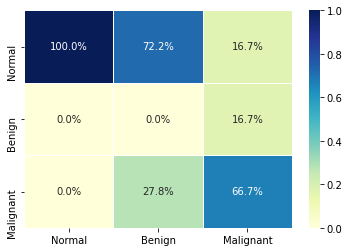

In [37]:
array = sklearn.metrics.confusion_matrix(pred_labs, label_test)
array = array / array.astype(np.float).sum(axis=0)
ax = sn.heatmap(array,annot=True,cmap="YlGnBu", linewidth=0.5,fmt=".1%",xticklabels=['Normal','Benign','Malignant'], yticklabels=['Normal','Benign','Malignant'])

figure = ax.get_figure()

# ResNet50

In [96]:
model = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(160,160, 3),
    pooling=None,
    classes=3,
    classifier_activation="softmax"
)
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 166, 166, 3)  0           input_12[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 80, 80, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 80, 80, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [97]:
optimizer=optimizers.SGD(lr=0.001, momentum=0.9)
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              # optimizer=optimizers.RMSprop(lr=1e-4),
              optimizer=optimizer,
              metrics=['accuracy'])

C:\Users\Umar\anaconda3\envs\keras\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [98]:
import tensorflow.keras.callbacks as callbacks
model_path = 'ResNet50.h5'
model_check_points = callbacks.ModelCheckpoint(filepath= model_path, monitor='val_loss', verbose=0, save_best_only=True,
                                                save_weights_only=False, mode='auto', save_freq='epoch',
                                                options=None)
ES = callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False )
monitor = 'categorical_accuracy'
# reduce_lr = callbacks.ReduceLROnPlateau(monitor=monitor, patience=3)

In [101]:
tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)
history =  model.fit(imgs,b, epochs=100, batch_size = batch_size, validation_split=0.05,
                    callbacks = [model_check_points])

Epoch 1/100
37/37 [==============================] - 4s 115ms/step - loss: 0.8328 - accuracy: 0.7279 - val_loss: 3.0471 - val_accuracy: 0.6875
Epoch 2/100
37/37 [==============================] - 4s 118ms/step - loss: 0.5021 - accuracy: 0.8435 - val_loss: 1.5171 - val_accuracy: 0.5625
Epoch 3/100
37/37 [==============================] - 4s 117ms/step - loss: 0.6282 - accuracy: 0.8061 - val_loss: 2.0870 - val_accuracy: 0.6250
Epoch 4/100
37/37 [==============================] - 4s 116ms/step - loss: 0.5621 - accuracy: 0.8299 - val_loss: 3.8416 - val_accuracy: 0.3750
Epoch 5/100
37/37 [==============================] - 4s 115ms/step - loss: 0.5383 - accuracy: 0.8163 - val_loss: 2.7076 - val_accuracy: 0.8125
Epoch 6/100
37/37 [==============================] - 4s 118ms/step - loss: 0.5629 - accuracy: 0.8571 - val_loss: 2.2489 - val_accuracy: 0.6875
Epoch 7/100
37/37 [==============================] - 4s 118ms/step - loss: 0.4877 - accuracy: 0.8435 - val_loss: 1.7018 - val_accuracy: 0.6875

Epoch 58/100
37/37 [==============================] - 4s 115ms/step - loss: 0.1481 - accuracy: 0.9728 - val_loss: 3.8554 - val_accuracy: 0.6250
Epoch 59/100
37/37 [==============================] - 4s 119ms/step - loss: 0.1252 - accuracy: 0.9592 - val_loss: 3.9383 - val_accuracy: 0.5625
Epoch 60/100
37/37 [==============================] - 4s 117ms/step - loss: 0.1116 - accuracy: 0.9796 - val_loss: 2.3710 - val_accuracy: 0.4375
Epoch 61/100
37/37 [==============================] - 4s 116ms/step - loss: 0.0821 - accuracy: 0.9830 - val_loss: 1.9454 - val_accuracy: 0.5000
Epoch 62/100
37/37 [==============================] - 4s 117ms/step - loss: 0.0731 - accuracy: 0.9694 - val_loss: 3.2302 - val_accuracy: 0.5625
Epoch 63/100
37/37 [==============================] - 4s 116ms/step - loss: 0.0784 - accuracy: 0.9830 - val_loss: 3.3073 - val_accuracy: 0.6250
Epoch 64/100
37/37 [==============================] - 4s 115ms/step - loss: 0.0867 - accuracy: 0.9728 - val_loss: 2.1813 - val_accuracy:

# InceptionV3

In [41]:
model = tf.keras.applications.InceptionV3(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(160,160, 3),
    pooling=None,
    classes=3,
    classifier_activation="softmax"
)
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 79, 79, 32)   864         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 79, 79, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 79, 79, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [55]:
optimizer=optimizers.SGD(lr=0.001, momentum=0.9)
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              # optimizer=optimizers.RMSprop(lr=1e-4),
              optimizer=optimizer,
              metrics=['accuracy'])

In [56]:
import tensorflow.keras.callbacks as callbacks
model_path = 'InceptionV3.h5'
model_check_points = callbacks.ModelCheckpoint(filepath= model_path, monitor='val_loss', verbose=0, save_best_only=True,
                                                save_weights_only=False, mode='auto', save_freq='epoch',
                                                options=None)
ES = callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False )
monitor = 'categorical_accuracy'
# reduce_lr = callbacks.ReduceLROnPlateau(monitor=monitor, patience=3)

In [57]:
tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)
history =  model.fit(imgs,b, epochs=50, batch_size = batch_size, validation_split=0.05,
                    callbacks = [model_check_points])

Epoch 1/50
37/37 [==============================] - 6s 157ms/step - loss: 0.6409 - accuracy: 0.7177 - val_loss: 6.6597 - val_accuracy: 0.7500
Epoch 2/50
37/37 [==============================] - 6s 160ms/step - loss: 0.6066 - accuracy: 0.7585 - val_loss: 3.8328 - val_accuracy: 0.8125
Epoch 3/50
37/37 [==============================] - 6s 156ms/step - loss: 0.6179 - accuracy: 0.7279 - val_loss: 4.2271 - val_accuracy: 0.7500
Epoch 4/50
37/37 [==============================] - 6s 161ms/step - loss: 0.5990 - accuracy: 0.7619 - val_loss: 4.3100 - val_accuracy: 0.7500
Epoch 5/50
37/37 [==============================] - 6s 159ms/step - loss: 0.5638 - accuracy: 0.7551 - val_loss: 2.4272 - val_accuracy: 0.5625
Epoch 6/50
37/37 [==============================] - 6s 157ms/step - loss: 0.5357 - accuracy: 0.7823 - val_loss: 3.5523 - val_accuracy: 0.6875
Epoch 7/50
37/37 [==============================] - 6s 162ms/step - loss: 0.5977 - accuracy: 0.7585 - val_loss: 3.7971 - val_accuracy: 0.7500
Epoch 

In [60]:
model.load_weights('InceptionV3.h5')
pred_labs = []
for i in range(len(label_test)):
    img =  imgs_test[i,:, :, :]
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    pred = pred.argmax(axis=1)
    pred_labs.append(pred[0])
    
pred_labs=np.array(pred_labs)

In [1]:
pred_labs = pred_labs+10
pred_labs = np.where(pred_labs==12,0, pred_labs)
pred_labs = np.where(pred_labs==11,2, pred_labs)
pred_labs = np.where(pred_labs==10,1, pred_labs)

label_test = label_test+10
label_test = np.where(label_test==12,0, label_test)
label_test = np.where(label_test==11,2, label_test)
label_test = np.where(label_test==10,1, label_test)

print('Accuracy is: ', get_accuracy(label_test, pred_labs))

NameError: name 'pred_labs' is not defined

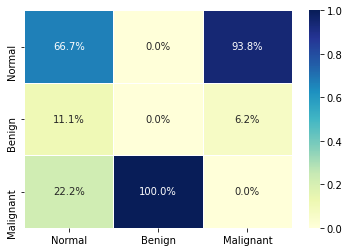

In [62]:
array = sklearn.metrics.confusion_matrix(pred_labs, label_test)
array = array / array.astype(np.float).sum(axis=0)
ax = sn.heatmap(array,annot=True,cmap="YlGnBu", linewidth=0.5,fmt=".1%",xticklabels=['Normal','Benign','Malignant'], yticklabels=['Normal','Benign','Malignant'])

figure = ax.get_figure()

# InceptionResNetV2


In [63]:
model = tf.keras.applications.InceptionResNetV2(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(160,160, 3),
    pooling=None,
    classes=3,
    classifier_activation="softmax"
)
model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 79, 79, 32)   864         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 79, 79, 32)   96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 79, 79, 32)   0           batch_normalization_188[0][0]    
________________________________________________________________________________

In [64]:
optimizer=optimizers.SGD(lr=0.001, momentum=0.9)
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              # optimizer=optimizers.RMSprop(lr=1e-4),
              optimizer=optimizer,
              metrics=['accuracy'])

C:\Users\Umar\anaconda3\envs\keras\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [65]:
import tensorflow.keras.callbacks as callbacks
model_path = 'InceptionResNetV2.h5'
model_check_points = callbacks.ModelCheckpoint(filepath= model_path, monitor='val_loss', verbose=0, save_best_only=True,
                                                save_weights_only=False, mode='auto', save_freq='epoch',
                                                options=None)
ES = callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False )
monitor = 'categorical_accuracy'
# reduce_lr = callbacks.ReduceLROnPlateau(monitor=monitor, patience=3)

In [66]:
tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)
history =  model.fit(imgs,b, epochs=50, batch_size = batch_size, validation_split=0.05,
                    callbacks = [model_check_points])

C:\Users\Umar\anaconda3\envs\keras\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(


Epoch 1/50
37/37 [==============================] - 15s 393ms/step - loss: 0.9674 - accuracy: 0.6122 - val_loss: 0.9812 - val_accuracy: 0.1875
Epoch 2/50
37/37 [==============================] - 14s 384ms/step - loss: 0.8487 - accuracy: 0.6463 - val_loss: 1.6986 - val_accuracy: 0.2500
Epoch 3/50
37/37 [==============================] - 14s 387ms/step - loss: 0.7884 - accuracy: 0.6939 - val_loss: 1.1608 - val_accuracy: 0.6875
Epoch 4/50
37/37 [==============================] - 14s 391ms/step - loss: 0.7739 - accuracy: 0.7007 - val_loss: 1.1101 - val_accuracy: 0.4375
Epoch 5/50
37/37 [==============================] - 14s 391ms/step - loss: 0.7293 - accuracy: 0.7211 - val_loss: 2.1708 - val_accuracy: 0.6250
Epoch 6/50
37/37 [==============================] - 15s 393ms/step - loss: 0.6713 - accuracy: 0.7381 - val_loss: 0.7911 - val_accuracy: 0.6875
Epoch 7/50
37/37 [==============================] - 14s 388ms/step - loss: 0.7135 - accuracy: 0.7245 - val_loss: 1.5462 - val_accuracy: 0.6875

In [67]:
model.load_weights('InceptionResNetV2.h5')
pred_labs = []
for i in range(len(label_test)):
    img =  imgs_test[i,:, :, :]
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    pred = pred.argmax(axis=1)
    pred_labs.append(pred[0])
    
pred_labs=np.array(pred_labs)

In [68]:
pred_labs = pred_labs+10
pred_labs = np.where(pred_labs==12,0, pred_labs)
pred_labs = np.where(pred_labs==11,2, pred_labs)
pred_labs = np.where(pred_labs==10,1, pred_labs)

label_test = label_test+10
label_test = np.where(label_test==12,0, label_test)
label_test = np.where(label_test==11,2, label_test)
label_test = np.where(label_test==10,1, label_test)

print('Accuracy is: ', get_accuracy(label_test, pred_labs))

Accuracy is:  66.07142857142857


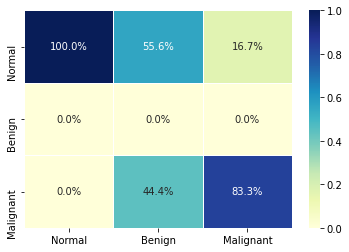

In [69]:
array = sklearn.metrics.confusion_matrix(pred_labs, label_test)
array = array / array.astype(np.float).sum(axis=0)
ax = sn.heatmap(array,annot=True,cmap="YlGnBu", linewidth=0.5,fmt=".1%",xticklabels=['Normal','Benign','Malignant'], yticklabels=['Normal','Benign','Malignant'])

figure = ax.get_figure()